<a href="https://colab.research.google.com/github/richirey75/Data-Mining-CS4990/blob/tiff/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting my drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


## To make shell commands we need the "!" before the command

In [2]:
!python --version

Python 3.10.12


- The % is a special command in Google Colab and Jupyter notebooks called a "magic command". These commands provide special functionalities.

- %cd is one such magic command which is used to change the current working directory.

In [3]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files
/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files


## USEFUL SHORTSCUTS

- Ctrl + M + H: Show all shortcuts
- Ctrl + M + B: Create a new cell below
- Ctrl + M + A: Create a new cell above
- Ctrl + M + D: Delete the current cell
- Ctrl + M + Y: Change cell to code
- Ctrl + M + M: Change cell to text
- Ctrl + Enter: Run the current cell
- Ctrl + Shift + Enter: Run the current cell and select the below cell

## Installation of Library
- We will using this library
  - [spotify library](https://spotipy.readthedocs.io/en/2.24.0/)


In [4]:
!pip install spotipy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 6.2 MB/s eta 0:00:00


## We need to import our libraries we will be using for the project
  - spotipy
  - pandas
  - numpy

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

## This is how we will identify to the API
- We need to first get a key from [spotify dev](https://developer.spotify.com/)
- Will get two keys
  - Client Id key
  - Client Secret key

- Follow by inputting our keys and autheticating

In [6]:
client_id = input("Enter your client_id: ")
client_secret = input("Enter your client_secret: ")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

Enter your client_id: 685b0de0fda641d892d411674647b015
Enter your client_secret: 01f2e18ab7ce4d4a8b740c7d3a007ae6


## Search function to query an artist
- As an example we the band call "the cramberries"
- This is just as if you were searching for an artists in the spotify environnement
- We get the artist ID

In [7]:
results = sp.search(q='The Cranberries', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

'7t0rwkOPGlDPEhaOcVtOt9'

## Here is how to retreve albums from the artist_id from above
- We will use the artist ID to retrieve the albums from the artist page

In [8]:
albums = sp.artist_albums(artist_id, album_type='album')

album_names = [album['name'] for album in albums['items']]

album_names

['To The Faithful Departed (Deluxe Edition)',
 'Remembering Dolores',
 'No Need To Argue (Remastered 2020)',
 'No Need To Argue (Deluxe)',
 'In the End',
 'Something Else',
 'Live At the Hammersmith Apollo, London 2012',
 'Roses',
 'Live 2010 - Zenith Paris, 22.03.10',
 'Bualadh Bos: The Cranberries Live',
 'Wake Up And Smell The Coffee',
 'Bury The Hatchet (The Complete Sessions 1998-1999)',
 'Bury The Hatchet',
 'To The Faithful Departed (The Complete Sessions 1996-1997)',
 'To The Faithful Departed',
 'No Need To Argue (The Complete Sessions 1994-1995)',
 "Everybody Else Is Doing It, So Why Can't We? (The Complete Sessions 1991-1993)",
 "Everybody Else Is Doing It, So Why Can't We? (Super Deluxe)",
 "Everybody Else Is Doing It, So Why Can't We?"]

## We can extract the songs from an album
- Here the code gives back the album songs from the 18 position on the list above

In [9]:
tracks = sp.album_tracks(albums['items'][18]['id'])
track_names = [track['name'] for track in tracks['items']]

track_names

['I Still Do',
 'Dreams',
 'Sunday',
 'Pretty',
 'Waltzing Back',
 'Not Sorry',
 'Linger',
 'Wanted',
 "Still Can't...",
 'I Will Always',
 'How',
 'Put Me Down']

## Using Pandas to organize
- We can use pandas to oprganize our data into a CSV file

In [10]:
df = pd.DataFrame({'Track Names': track_names})
df.to_csv('track_names.csv', index=False)
df

,Track Names
0,I Still Do
1,Dreams
2,Sunday
3,Pretty
4,Waltzing Back
5,Not Sorry
6,Linger
7,Wanted
8,Still Can't...
9,I Will Always


## We enter the file that we want to save the svc files to

In [11]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files
/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files


# Now we use all the tools we learn above to queary an artist and retrieve all their information
- We query the artist
- Scrape their information
- Scrape their albums
- Scrape each song in their discography
- Use panda to save them in CSV files
- Lastly we save them in our drive

In [12]:
# Artist information
artist_name = input("Enter an artist name: ")
result = sp.search(q=artist_name, limit=1, type='artist')
artist = result['artists']['items'][0]

artist_info = {
    'name': artist['name'],
    'id': artist['id'],
    'popularity': artist['popularity'],
    'genres': artist['genres'],
    'followers': artist['followers']['total']
}

# Album and track information with audio features
albums = sp.artist_albums(artist['id'], album_type='album')
all_tracks = []

for album in albums['items']:
    album_info = {
        'album_name': album['name'],
        'album_id': album['id'],
        'release_date': album['release_date'],
        'total_tracks': album['total_tracks']
    }

    tracks = sp.album_tracks(album['id'])
    for track in tracks['items']:
        track_info = {
            'track_name': track['name'],
            'track_id': track['id'],
            'duration_min': track['duration_ms'] / 60000
        }
        try:
            track_info['popularity'] = track['popularity']
        except KeyError:
            track_info['popularity'] = None

        # Get audio features
        audio_features = sp.audio_features(track['id'])[0]
        if audio_features:
            track_info.update(audio_features)

        all_tracks.append({**album_info, **track_info})

# Create DataFrames
artist_df = pd.DataFrame([artist_info])
tracks_df = pd.DataFrame(all_tracks)

# Save to CSV
artist_df.to_csv(f'{artist_name}_artist_info.csv', index=False)
tracks_df.to_csv(f'{artist_name}_tracks_info.csv', index=False)

Enter an artist name: Backstreet Boys


## Here is to concatenate the CSV files

In [13]:
# df1 = pd.read_csv('Oasis_tracks_info.csv')
# df2 = pd.read_csv('cranberries_tracks_info.csv')

df1 = pd.read_csv('Backstreet Boys_tracks_info.csv')
df2 = pd.read_csv('*NSYNC_tracks_info.csv')

combined_df = pd.concat([df1, df2]) # add more DataFrames to the list if needed
combined_df.to_csv('combined_tracks_info.csv', index=False)

In [14]:
combined_df.head()

,album_name,album_id,release_date,total_tracks,track_name,track_id,duration_min,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,A Very Backstreet Christmas,0DmM20iJ1NjdQSxGs6kCGt,2022-10-14,13,White Christmas,4bFPVxyEZSh3kY59DYQK2E,2.750000,NaN,0.601,0.647,...,0.154,0.717,128.019,audio_features,4bFPVxyEZSh3kY59DYQK2E,spotify:track:4bFPVxyEZSh3kY59DYQK2E,https://api.spotify.com/v1/tracks/4bFPVxyEZSh3...,https://api.spotify.com/v1/audio-analysis/4bFP...,165000,4
1,A Very Backstreet Christmas,0DmM20iJ1NjdQSxGs6kCGt,2022-10-14,13,The Christmas Song,6FVpqckXY1Fy7uUG7FWoS7,3.687383,NaN,0.511,0.633,...,0.106,0.296,118.368,audio_features,6FVpqckXY1Fy7uUG7FWoS7,spotify:track:6FVpqckXY1Fy7uUG7FWoS7,https://api.spotify.com/v1/tracks/6FVpqckXY1Fy...,https://api.spotify.com/v1/audio-analysis/6FVp...,221243,4
2,A Very Backstreet Christmas,0DmM20iJ1NjdQSxGs6kCGt,2022-10-14,13,Winter Wonderland,7ecfZxGVN2PphzwOLd4GSQ,1.675800,NaN,0.591,0.426,...,0.124,0.758,74.874,audio_features,7ecfZxGVN2PphzwOLd4GSQ,spotify:track:7ecfZxGVN2PphzwOLd4GSQ,https://api.spotify.com/v1/tracks/7ecfZxGVN2Pp...,https://api.spotify.com/v1/audio-analysis/7ecf...,100548,4
3,A Very Backstreet Christmas,0DmM20iJ1NjdQSxGs6kCGt,2022-10-14,13,Have Yourself A Merry Little Christmas,64lfXz9wH5sFTGypE1aPiM,3.507783,NaN,0.366,0.458,...,0.277,0.239,76.710,audio_features,64lfXz9wH5sFTGypE1aPiM,spotify:track:64lfXz9wH5sFTGypE1aPiM,https://api.spotify.com/v1/tracks/64lfXz9wH5sF...,https://api.spotify.com/v1/audio-analysis/64lf...,210467,4
4,A Very Backstreet Christmas,0DmM20iJ1NjdQSxGs6kCGt,2022-10-14,13,Last Christmas,3Zzvc5u4V0jC6vwHroHKcJ,3.776400,NaN,0.681,0.815,...,0.130,0.253,112.005,audio_features,3Zzvc5u4V0jC6vwHroHKcJ,spotify:track:3Zzvc5u4V0jC6vwHroHKcJ,https://api.spotify.com/v1/tracks/3Zzvc5u4V0jC...,https://api.spotify.com/v1/audio-analysis/3Zzv...,226585,4


# Identify which features have the strongest relationship with 'danceability'

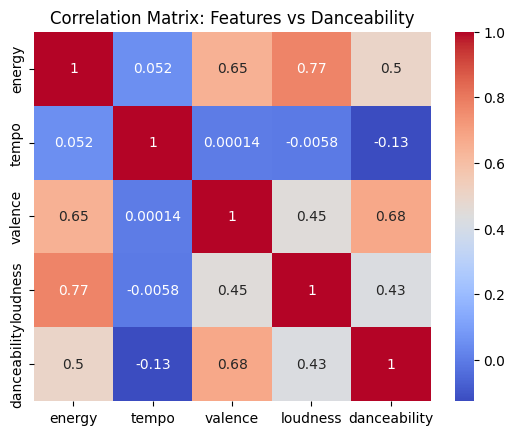

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlations only for the features against danceability
feature_columns = ['energy', 'tempo', 'valence', 'loudness']  # list of features
df_corr = combined_df[feature_columns + ['danceability']].corr()

# Plot the heatmap to see the correlations
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Features vs Danceability')
plt.show()